### Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
data = pd.read_csv("multiple_linear_regression.csv")

In [3]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Data Preprocessing

In [5]:
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [7]:
data.shape

(200, 4)

### Splitting Data

In [8]:
output_col = "Target"

In [9]:
# Will include all the column except the "Target" column
# input
x = data.iloc[:,data.columns!=output_col]

In [10]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
# Since we have only one column in output data, we use "loc"
# output
y = data.loc[:,output_col]

In [12]:
from sklearn.model_selection import train_test_split
# train_input, train_output, test_input, test_output
# random_state : randomly shuffle data into train and test
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=99)

In [13]:
X_train.shape

(140, 3)

In [14]:
X_test.shape

(60, 3)

In [15]:
y_train.shape

(140,)

In [16]:
y_test.shape

(60,)

### Multiple Linear Regression

#### Training

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# Cause we have 3 parameters it returns 3 optimal value 
lr.coef_

array([0.04648032, 0.18594407, 0.00556825])

In [19]:
lr.intercept_

2.576941878933358

### Prediction

In [20]:
pred_value = lr.predict(X_test)

### Cost

In [22]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test,pred_value)
# Error range of predicted value
cost

2.0607826395164413

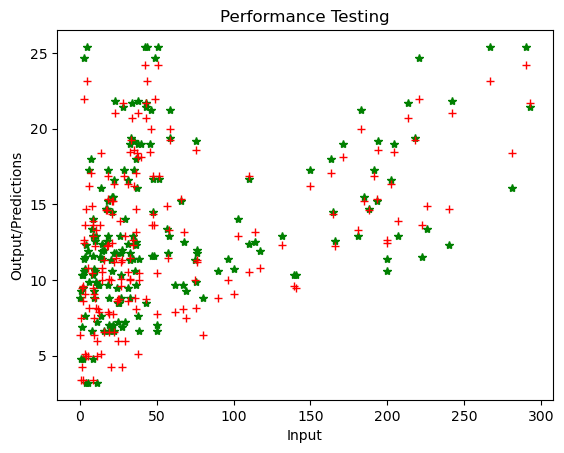

In [23]:
plt.plot(X_test,y_test,"*",color='green')
plt.plot(X_test,pred_value,"+",color='red')
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

### Assumptions of Linear Regression

#### Homoscedasticity
* Graph between residuals (error/diff between actual and predicted value) and predictions shouldn’t have any correlation.

In [24]:
pred_value

array([13.60864245,  6.35589127,  8.12781127,  8.62754605,  6.57793714,
       21.00629258, 14.69076122, 23.15472995, 10.45446612, 16.89726744,
       15.34414426,  8.0669324 ,  4.95620139,  7.76639804, 12.63279747,
        5.11732494,  7.91745992, 13.90265159, 12.46521084, 18.13092281,
        8.7634657 ,  8.78585924, 14.60850319, 19.98172014, 12.31243206,
        7.51837502, 12.23152436, 16.31171563, 19.25336013, 16.85481529,
       10.01692564, 24.19281839, 18.43727408, 11.32594396,  9.50153842,
       14.37312027, 12.90118815, 16.18806366, 13.61931842, 10.06623584,
       13.16864108,  9.04867449, 15.19847952, 10.78788142, 10.5159945 ,
       14.9115452 , 13.31396517,  9.59954424, 21.94563344,  3.3727234 ,
       20.68429144, 18.58355924, 11.47937944, 18.41461487, 11.21691673,
        4.26792396,  5.94971166, 10.03254255, 17.06042047, 21.69379246])

In [27]:
# Also shows index value for each data
residuals = y_test - pred_value

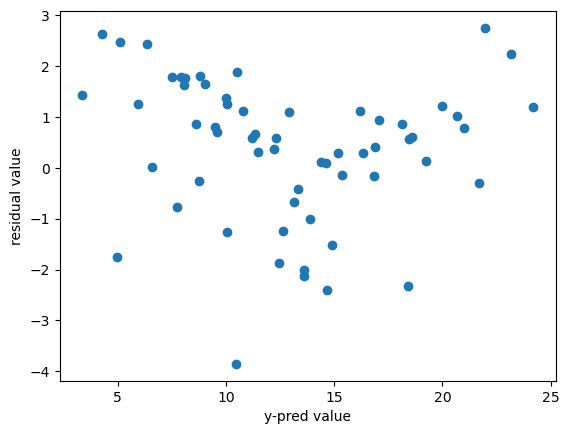

In [29]:
plt.scatter(pred_value,residuals)
plt.xlabel('y-pred value')
plt.ylabel('residual value')
plt.show()

### Normality of the Residuals

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_32280/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

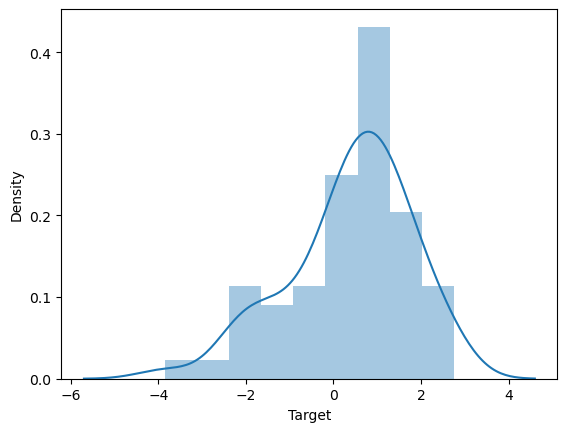

In [31]:
# Majority of the errors are closer to zero
sns.distplot(residuals)

### Ordinary Least Square (OLS) Method

In [33]:
import statsmodels.api as sm

In [32]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [34]:
# Adding a constant parameter to the training data
# Required to keep the "c" value
# Since, "c" value is a scalar we muliply it with a constant vector to convert it into a vector quantity
x_with_constant = sm.add_constant(X_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
166,1.0,17.9,37.6,21.6
172,1.0,19.6,20.1,17.0
57,1.0,136.2,19.2,16.6
158,1.0,11.7,36.9,45.2
116,1.0,139.2,14.3,25.6
...,...,...,...,...
68,1.0,237.4,27.5,11.0
168,1.0,215.4,23.6,57.6
185,1.0,205.0,45.1,19.6
35,1.0,290.7,4.1,8.5


In [35]:
model  = sm.OLS(y_train,x_with_constant)

In [36]:
result = model.fit()

In [37]:
result.params

const        2.576942
Feature 1    0.046480
Feature 2    0.185944
Feature 3    0.005568
dtype: float64

In [38]:
lr.coef_

array([0.04648032, 0.18594407, 0.00556825])

In [39]:
lr.intercept_

2.576941878933358

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     348.9
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.18e-63
Time:                        23:48:01   Log-Likelihood:                -278.87
No. Observations:                 140   AIC:                             565.7
Df Residuals:                     136   BIC:                             577.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5769      0.416      6.194      0.0

* We can observe that R Squared value is close to 1 suggest that we have a linear relationship in our model
* Probability of F-Statistic (1.18e-63) is very close to 0 which suggests 
that we can reject the null hypothesis
* P-Statistics for all three features are almost 0 which suggests that all features 
have a significant impact on target variable.

In [42]:
X_test = sm.add_constant(X_test)

In [43]:
# Prediction in acse of OLS summary model
y_pred = result.predict(X_test)